## List all the rails and their indexes before beginning

In [2]:
from perfetto.trace_processor import TraceProcessor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialise TraceProcessor with a trace file
# tp = TraceProcessor(trace='trace_iperf.perfetto-trace')
# tp = TraceProcessor(trace='trace_5M_band66.perfetto-trace')
# phone_str = "Pixel8"

# phone_str = "Pixel7A"
# trace_name = "pixel7_5G_standby_1";
# tp = TraceProcessor(trace="../Traces/"+phone_str+"/"+trace_name+".perfetto-trace") 
tp = TraceProcessor(trace="../pixel7_sample_3mintrace.perfetto-trace") 

# print(tp)
qr_it = tp.query('SELECT * FROM counter_track')
# print(qr_it)
qr_it_pandas = qr_it.as_pandas_dataframe()
print(qr_it_pandas)

# qr_it_pd2 = qr_it_pandas.filter(regex='power.rails.display')
# print(qr_it_pandas[qr_it_pandas['name']=='power.rails.display'])
# for row in qr_it:
#   print(row.id, row.type, row.name)


ModuleNotFoundError: No module named 'perfetto'

## Create a id map for important power rails to be used in 01 notebook

Text(0.5, 0.98, 'Raw Values, can be tallied if needed with Perfetto UI')

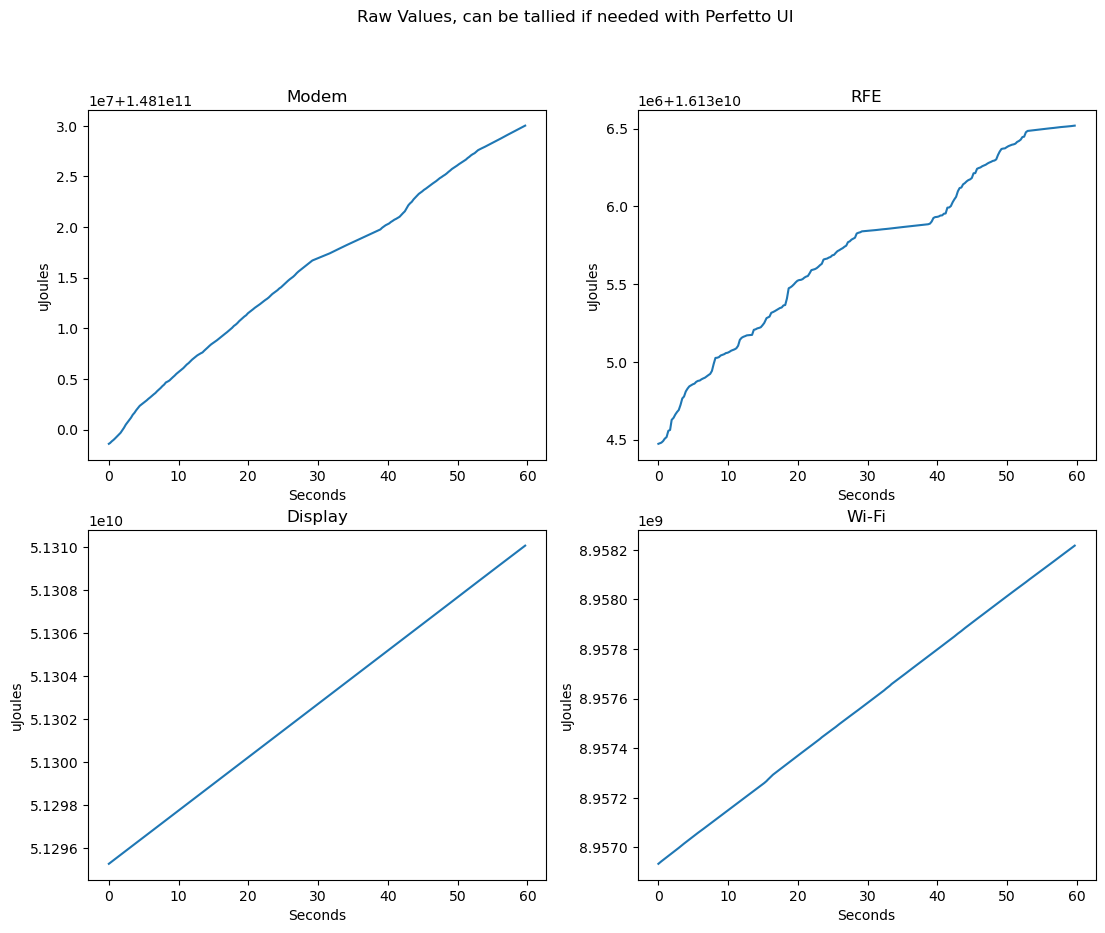

In [ ]:
# Define the power rails to monitor
# Note: These track IDs may vary depending on the device and trace
id_mapper = [23, 24, 10, 22]
string_mapper = ["Modem", "RFE", "Display", "Wi-Fi"]

# Fetch data for each power rail and convert to list format
df_list_cleaned = [
    tp.query(f'SELECT ts,value FROM counter WHERE track_id={track_id}')
    .as_pandas_dataframe()
    .replace(np.nan, 0)
    .values.tolist() 
    for track_id in id_mapper
]

# Convert to numpy array for easier manipulation
df_np = np.array(df_list_cleaned)

# Normalize timestamps: start from 0 and convert from nanoseconds to seconds
df_np[:, :, 0] = df_np[:, :, 0] - np.tile(df_np[:, 0, 0], [df_np.shape[1], 1]).T
df_np[:, :, 0] = df_np[:, :, 0] / 1e9

# Create plots for each power rail
plt.rcParams['figure.figsize'] = [13, 10]
for i in range(len(id_mapper)):
    plt.subplot(2, 2, i + 1)
    x_vals = df_np[i, :, 0]  # Timestamps (seconds)
    y_vals = df_np[i, :, 1]  # Power values (µJoules)
    plt.plot(x_vals, y_vals)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Power (µJoules)")
    plt.title(string_mapper[i])

plt.suptitle("Power Rails Over Time")
plt.tight_layout()
plt.show()
